In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

from IPython.display import Image, display

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
df = pd.read_csv('bike.csv')
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetimeobj,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,5,4


In [13]:
# year, month, day, day of week, time
df['datetimeobj'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetimeobj'].dt.year
df['month'] = df['datetimeobj'].dt.month
df['day'] = df['datetimeobj'].dt.day
df['dayofweek'] = df['datetimeobj'].dt.dayofweek
df['hour'] = df['datetimeobj'].dt.hour

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetimeobj,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,5,4


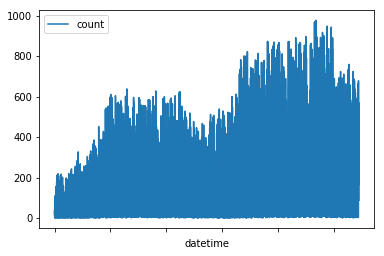

In [6]:
df.plot(x='datetime', y='count')

month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: count, dtype: object

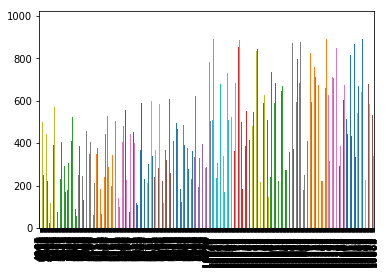

In [7]:
plt.figure()
df.groupby('month')['count'].plot(kind='bar')

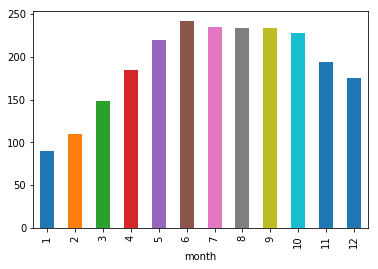

In [8]:
plt.figure()
df.groupby('month')['count'].mean().plot(kind='bar')

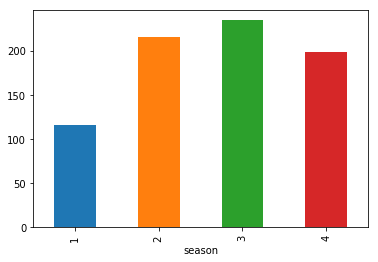

In [9]:
plt.figure()
df.groupby('season')['count'].mean().plot(kind='bar')

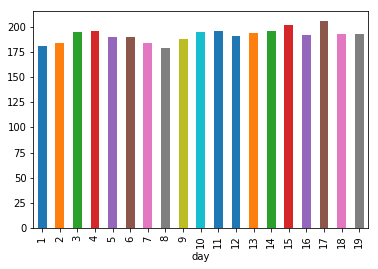

In [11]:
plt.figure()
df.groupby('day')['count'].mean().plot(kind='bar')

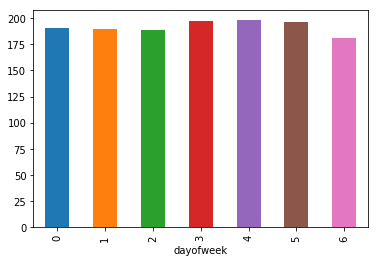

In [12]:
plt.figure()
df.groupby('dayofweek')['count'].mean().plot(kind='bar')

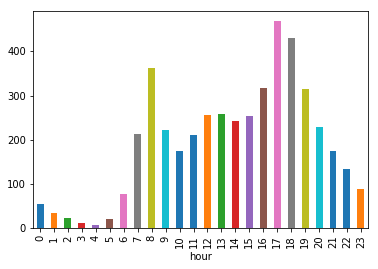

In [13]:
plt.figure()
df.groupby('hour')['count'].mean().plot(kind='bar')

In [14]:
holiday_hour = df.groupby(['holiday', 'hour'])['count'].mean()
holiday_hour

holiday  hour
0        0        54.796380
         1        33.582766
         2        22.747126
         3        11.738717
         4         6.377622
         5        19.961276
         6        77.357466
         7       216.119910
         8       366.703620
         9       222.088235
         10      173.461538
         11      208.787330
         12      254.693002
         13      255.774266
         14      241.164786
         15      253.169300
         16      316.417607
         17      471.722348
         18      433.392777
         19      316.306998
         20      228.792325
         21      173.121896
         22      133.347630
         23       90.009029
1        0        66.769231
         1        43.230769
         2        28.000000
         3        12.416667
         4         7.384615
         5        13.230769
         6        38.923077
         7       111.000000
         8       229.000000
         9       211.307692
         10      230.538462
      

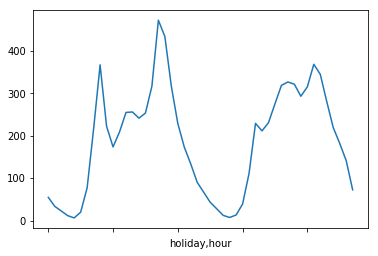

In [15]:
holiday_hour.plot()

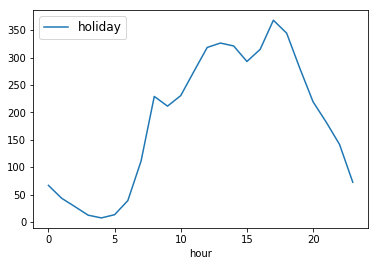

In [18]:
holiday_hour_2 = df.query('holiday == 1').groupby('hour')['count'].mean()
holiday_hour_2.plot(label='holiday')
plt.legend(fontsize=12)

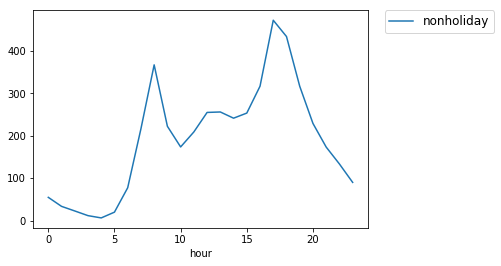

In [19]:
nonholiday_hour = df.query('holiday == 0').groupby('hour')['count'].mean()
nonholiday_hour.plot(label='nonholiday')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

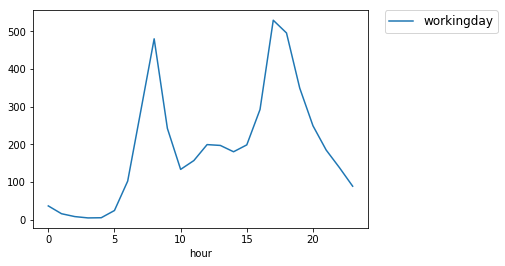

In [21]:
workingday_hour = df.query('workingday == 1').groupby('hour')['count'].mean()
workingday_hour.plot(label='workingday')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

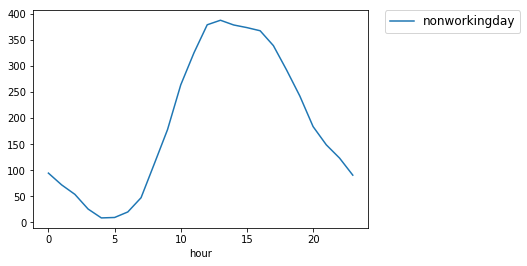

In [22]:
nonworkingday_hour = df.query('workingday == 0').groupby('hour')['count'].mean()
nonworkingday_hour.plot(label='nonworkingday')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

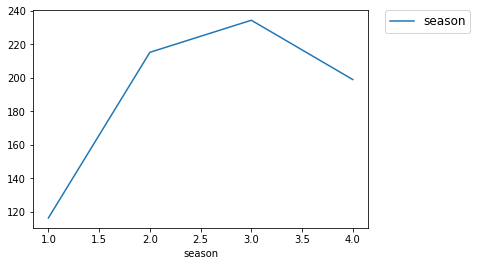

In [23]:
plt.figure()
season = df.groupby('season')['count'].mean()
season.plot(label ='season')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

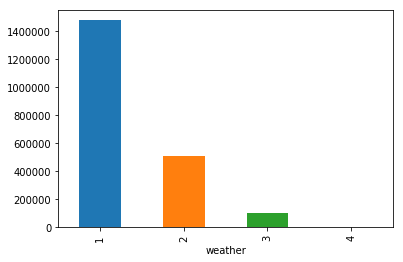

In [24]:
df.groupby('weather')['count'].sum().plot(kind='bar')

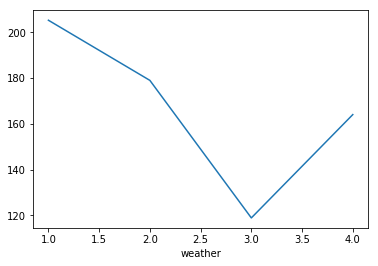

In [25]:
df.groupby('weather')['count'].mean().plot(kind='line')

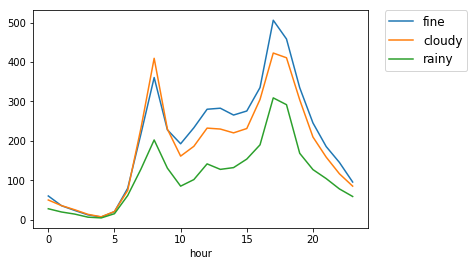

In [26]:
df.query('weather == 1').groupby('hour')['count'].mean().plot(label='fine')
df.query('weather == 2').groupby('hour')['count'].mean().plot(label='cloudy')
df.query('weather == 3').groupby('hour')['count'].mean().plot(label='rainy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

<Figure size 432x288 with 0 Axes>

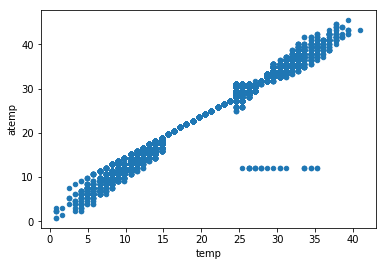

In [27]:
# 気温と体感温度との関係
plt.figure()
df.plot(x='temp', y='atemp', kind='scatter')

<Figure size 432x288 with 0 Axes>

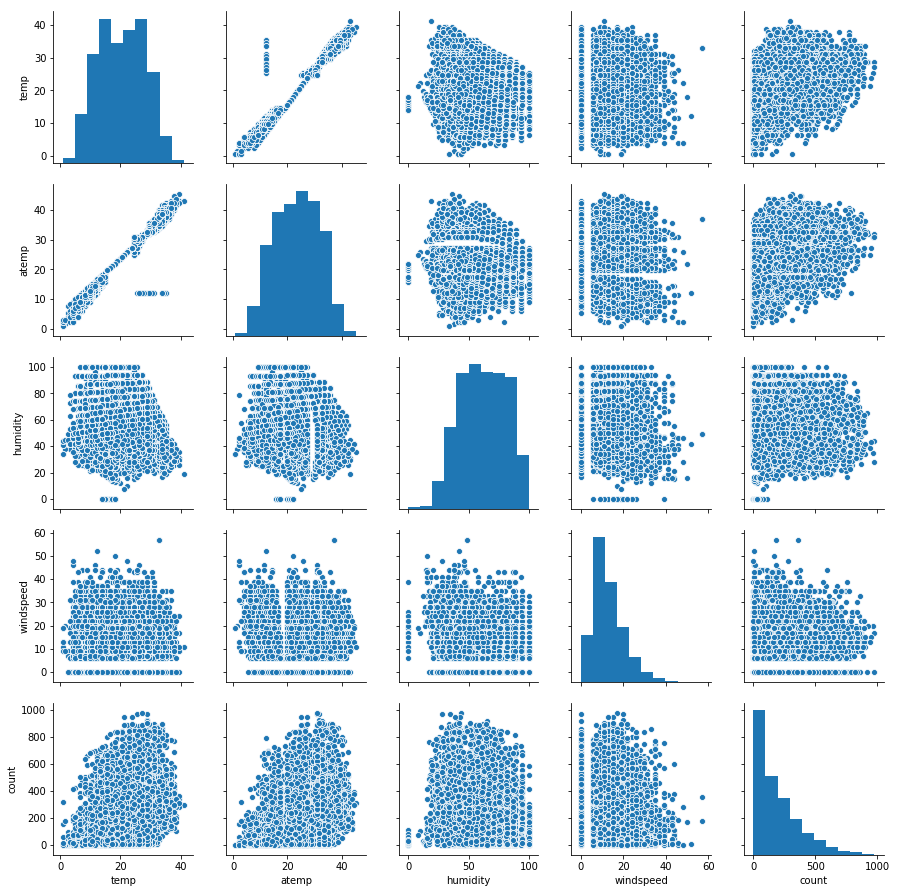

In [28]:
import seaborn as sns
# 温度，体感温度，湿度，風速，貸出数の関係
plt.figure()
sns.pairplot(data=df[['temp', 'atemp', 'humidity', 'windspeed', 'count']])

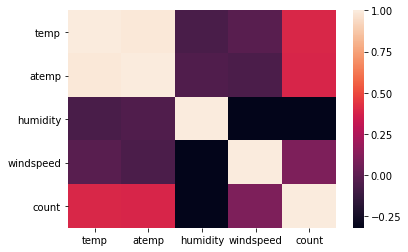

In [29]:
# 相関係数をヒートマップで表示
plt.figure()
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr())

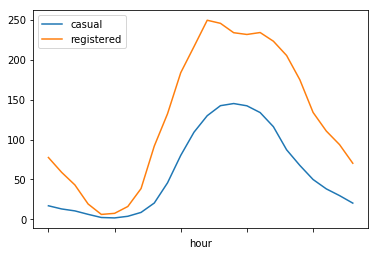

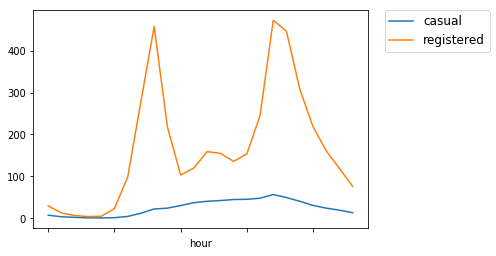

In [33]:
df.query('workingday == 0').groupby('hour')['casual','registered'].mean().plot(label='working')
df.query('workingday == 1').groupby('hour')['casual','registered'].mean().plot(label='non-working')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm


# 説明変数と目的変数
X = df.loc[:, ['month']].values
y = df.loc[:, ['count']].values

# トレーニングデータとテストデータとの分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 回帰分析(最小二乗法による回帰分析)
model = sm.ols(formula = 'count ~ month', data = df)

# 回帰分析を実行
result = model.fit()

# 分析結果
print(result.summary())
print(result.params['Intercept'])
print(result.params['month'])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     311.7
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           8.34e-69
Time:                        00:58:36   Log-Likelihood:                -71892.
No. Observations:               10886   AIC:                         1.438e+05
Df Residuals:                   10884   BIC:                         1.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.3446      3.666     36.649      0.0

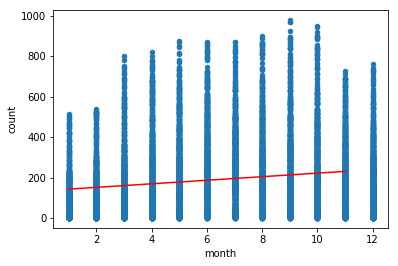

In [15]:
ax = np.arange(1, 12, 1)
ay = result.params['month'] * ax + result.params['Intercept']

ax2 = df.plot(x = 'month', y = 'count', kind = 'scatter')
ax2.plot(ax, ay, color = 'r')

In [16]:
# 説明変数と目的変数
X = df.loc[:, ['temp']].values
y = df.loc[:, ['count']].values

# トレーニングデータとテストデーtとの分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 回帰分析(最小二乗法による回帰分析)
model = sm.ols(formula = 'count ~ temp', data = df)

# 回帰分析を実行
result = model.fit()

# 分析結果
print(result.summary())
print(result.params['Intercept'])
print(result.params['temp'])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2006.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:58:47   Log-Likelihood:                -71125.
No. Observations:               10886   AIC:                         1.423e+05
Df Residuals:                   10884   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0462      4.439      1.362      0.1

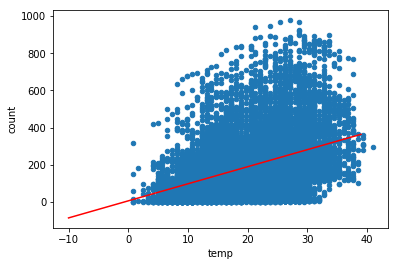

In [17]:
ax = np.arange(-10, 40, 1)
ay = result.params['temp'] * ax + result.params['Intercept']

ax2 = df.plot(x = 'temp', y = 'count', kind = 'scatter')
ax2.plot(ax, ay, color = 'r')

In [18]:
# 質的変数をカテゴリ変数に変換する
for v in ["season","holiday","workingday","weather","month","year","hour"]:
    df[v] = df[v].astype("category")

In [50]:
model_w = sm.ols(formula="count ~ hour + temp", data=df)
result_w = model_w.fit()
print(result_w.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     662.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:22:32   Log-Likelihood:                -67135.
No. Observations:               10886   AIC:                         1.343e+05
Df Residuals:                   10861   BIC:                         1.345e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -71.9198      6.090    -11.809      0.0

In [53]:
model_working = sm.ols(formula="count ~ hour + month + year + weather + temp", data=df.query('workingday == 1'))
result_working = model_working.fit()
print(result_working.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     975.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:24:48   Log-Likelihood:                -42451.
No. Observations:                7412   AIC:                         8.498e+04
Df Residuals:                    7372   BIC:                         8.526e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -133.8213      5.704    -23.462   

In [54]:
model_working = sm.ols(formula="count ~ hour + month + year + weather + temp", data=df.query('workingday == 0'))
result_working = model_working.fit()
print(result_working.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     374.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:25:28   Log-Likelihood:                -20000.
No. Observations:                3474   AIC:                         4.008e+04
Df Residuals:                    3435   BIC:                         4.032e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -110.7837      8.537    -12.977   

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [8]:
# ランダムフォレストモデル
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

In [40]:
# 説明変数（説明変数の選び方がポイント）
df_X = df[['month', 'hour', 'temp']]
# 目的変数
df_y = df['count']

# データセットをトレーニングデータとテストデータとに分ける
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size = 0.3, random_state = 0)

# ランダムフォレストモデルを生成
# 決定木の数=n_estimators は，10とする
clf0 = RandomForestClassifier(random_state = 0, n_estimators = 10)
clf = clf0.fit(train_X, train_y)

In [41]:
# 結果検証
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label = 1)

# AUCは，１に近づくほどよい
print('AUC:', auc(fpr, tpr))

# 正答率
print('score:', accuracy_score(pred, test_y))

AUC: 0.06982564065230051
score: 0.01837109614206981


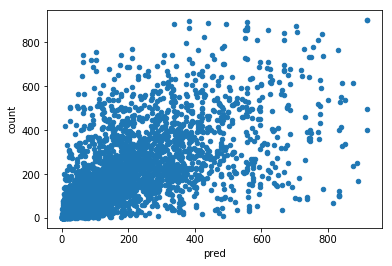

In [42]:
# 結果を散布図表示
result = pd.DataFrame(test_y)
result['pred'] = pred
result.plot(x = 'pred', y = 'count', kind = 'scatter')

In [9]:
# 説明変数（説明変数の選び方がポイント）
df_X = df[['day', 'hour', 'atemp']]
# 目的変数
df_y = df['count']

# データセットをトレーニングデータとテストデータとに分ける
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size = 0.3, random_state = 0)

# ランダムフォレストモデルを生成
# 決定木の数=n_estimators は，10とする
clf0 = RandomForestClassifier(random_state = 0, n_estimators = 10)
clf = clf0.fit(train_X, train_y)

In [10]:
# 結果検証
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label = 1)


# AUCは，１に近づくほどよい
print('AUC:', auc(fpr, tpr))

# 正答率
print('score:', accuracy_score(pred, test_y))

AUC: 0.07536764705882354
score: 0.010104102878138396


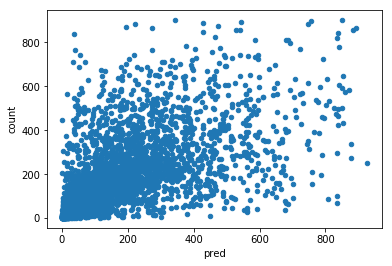

In [19]:
# 結果を散布図表示
result = pd.DataFrame(test_y)
result['pred'] = pred
result.plot(x = 'pred', y = 'count', kind = 'scatter')